<a href="https://colab.research.google.com/github/FBehrad/Charm/blob/main/charm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Get requirements.py**


In [ ]:
!wget https://raw.githubusercontent.com/FBehrad/Charm/refs/heads/main/requirements.txt



---


**2. Install the rquirements:**


In [ ]:
!pip install -r requirements.txt
!pip install "numpy<2"



---
**3. Install Charm tokenizer**


In [ ]:
!pip install Charm-tokenizer

**⚠️ Important Step:**

To prevent compatibility issues, please **restart the Colab session now**.
Go to the "Runtime" menu at the top, then click "Restart session".


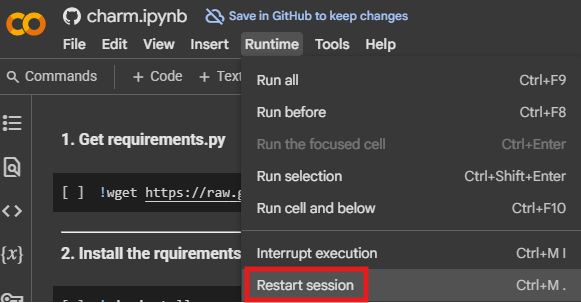





---

**4. Prepare patches and their corresponding position embeddings**

Charm Tokenizer has the following input args:

*   patch_selection (str): The method for selecting important patches: Options: 'saliency', 'random', 'frequency', 'gradient', 'entropy', 'original'.
*   training_dataset (str): Used to set the number of ViT input tokens to match a specific training dataset from the paper.
  * Aesthetic assessment datasets: 'ava', 'aadb', 'tad66k', 'para', 'baid'.
  * Quality assessment datasets: 'spaq', 'koniq10k'.

* backbone (str): The ViT backbone model (default: 'facebook/dinov2-small' **(for all datasets except for AVA)** and 'facebook/dinov2-large' **(Just for AVA)**.
* factor (float): The downscaling factor for less important patches (default: 0.5).
* scales (int): The number of scales used for multiscale processing (default: 2).
* random_crop_size (tuple): Used for the 'original' patch selection strategy (default: (224, 224)).
* downscale_shortest_edge (int): Used for the 'original' patch selection strategy (default: 256).
* without_pad_or_dropping (bool): Whether to avoid padding or dropping patches (default: True).


The output is the preprocessed tokens, their corresponding positional embeddings, and a mask token that indicates which patches are in high resolution and which are in low resolution.


**Note:** While random patch selection during training helps avoid overfitting,for consistent results during inference, fully deterministic patch selection approaches should be used.

In [ ]:
from Charm_tokenizer.ImageProcessor import Charm_Tokenizer
import requests

url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
img_path = requests.get(url, stream=True).raw

charm_tokenizer = Charm_Tokenizer(patch_selection='frequency', training_dataset='ava', backbone='facebook/dinov2-large', without_pad_or_dropping=True)
tokens, pos_embed, mask_token = charm_tokenizer.preprocess(img_path)



---
**5. Predict aesthetic score**

* If training_dataset is set to 'spaq' or 'koniq10k', the model predicts the image *quality* score. For other options ('aadb', 'tad66k', 'para', 'baid'), it predicts the image *aesthetic* score.

* Selecting a dataset with image resolutions similar to your input images can improve prediction accuracy.

* For more details about the process, please refer to the paper.



In [ ]:
from Charm_tokenizer.Backbone import backbone
from Charm_tokenizer import model

model = backbone(training_dataset='ava', device='cpu')
prediction = model.predict(tokens, pos_embed, mask_token)